In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn import tree

In [3]:
titanic_data = pd.read_csv('../data/titanic/train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [11]:
X.Age.median()

28.0

In [12]:
X = X.fillna({'Age' : X.Age.median() })

In [13]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
X.shape

(891, 10)

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
clf.score(X,y)

0.9797979797979798

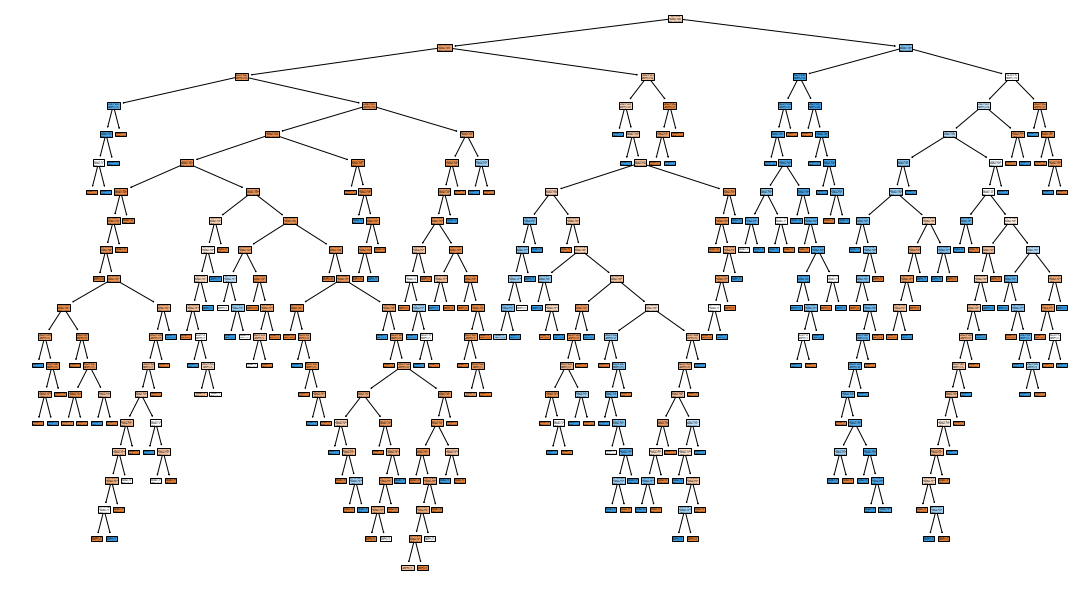

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
tree.plot_tree(clf, ax=ax, filled=True);

In [19]:
X.duplicated().value_counts()

False    758
True     133
dtype: int64

In [20]:
X.duplicated(keep=False).value_counts()

False    691
True     200
dtype: int64

In [21]:
X[X.duplicated()].head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
47,3,28.0,0,0,7.7500,1,0,0,1,0
55,1,28.0,0,0,35.5000,0,1,0,0,1
76,3,28.0,0,0,7.8958,0,1,0,0,1
77,3,28.0,0,0,8.0500,0,1,0,0,1
87,3,28.0,0,0,8.0500,0,1,0,0,1


In [22]:
X[X.duplicated(keep=False)].sort_values(by=list(X.columns)).head(15)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
369,1,24.0,0,0,69.3000,1,0,1,0,0
641,1,24.0,0,0,69.3000,1,0,1,0,0
633,1,28.0,0,0,0.0000,0,1,0,0,1
815,1,28.0,0,0,0.0000,0,1,0,0,1
430,1,28.0,0,0,26.5500,0,1,0,0,1
507,1,28.0,0,0,26.5500,0,1,0,0,1
711,1,28.0,0,0,26.5500,0,1,0,0,1
64,1,28.0,0,0,27.7208,0,1,1,0,0
295,1,28.0,0,0,27.7208,0,1,1,0,0
23,1,28.0,0,0,35.5000,0,1,0,0,1


In [23]:
list(X.columns)

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [24]:
y.iloc[[369, 641]]

369    1
641    1
Name: Survived, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
clf.score(X_train, y_train)

0.8406040268456376

In [30]:
clf.score(X_test, y_test)

0.8067796610169492

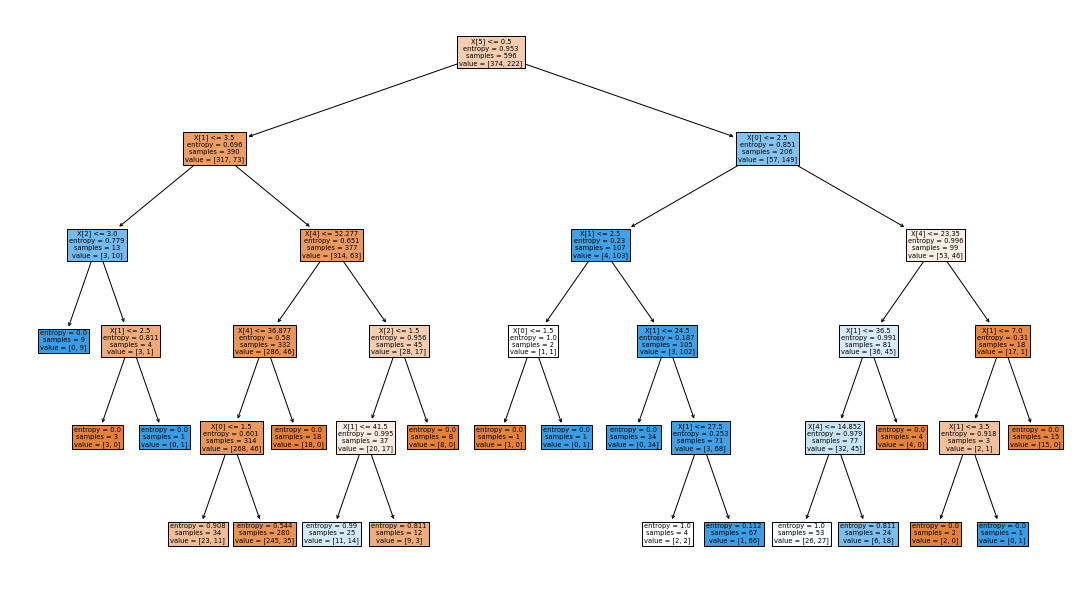

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
tree.plot_tree(clf, ax=ax,  filled=True);

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
print((clf.score(X_train, y_train), clf.score(X_test, y_test)))

(0.8238255033557047, 0.8203389830508474)


In [35]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0


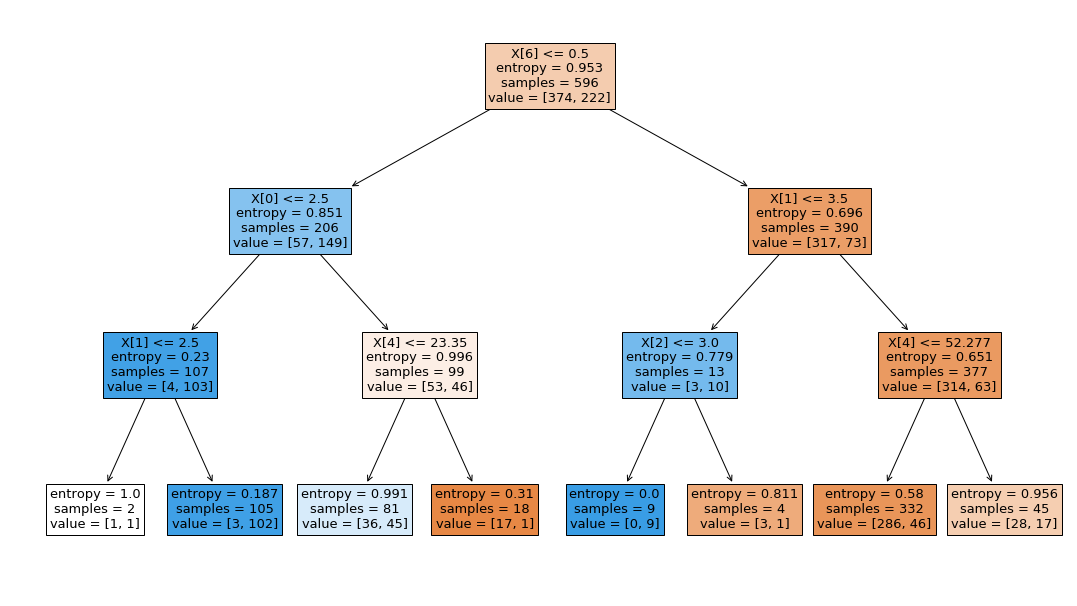

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
tree.plot_tree(clf, ax=ax, filled=True);

In [37]:
y_train.value_counts()

0    374
1    222
Name: Survived, dtype: int64

In [38]:
max_depth_values = range(1,100)

In [39]:
scores_data = pd.DataFrame()

In [40]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                   'train_score' : [train_score],
                                    'test_score' : [test_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [41]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type',
                          value_name='score' 
                          )

In [43]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [44]:
scores_data_long.tail()

,max_depth,set_type,score
193,95,test_score,0.776271
194,96,test_score,0.772881
195,97,test_score,0.755932
196,98,test_score,0.762712
197,99,test_score,0.766102


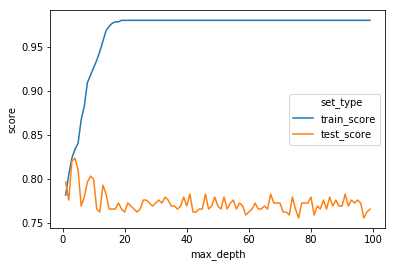

In [45]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                   'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [48]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type',
                          value_name='score' 
                          )

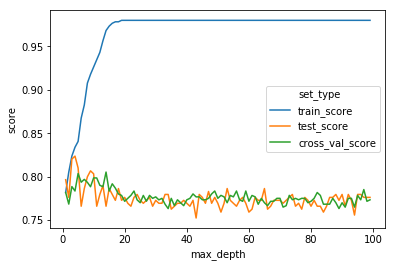

In [49]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [53]:
scores_data_long[scores_data_long.set_type == 'cross_val_score'].head()

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.803664


In [54]:
scores_data_long[scores_data_long.set_type == 'cross_val_score'].score.idxmax()

211

In [58]:
scores_data_long.iloc[211]

max_depth                 14
set_type     cross_val_score
score               0.805387
Name: 211, dtype: object